In [0]:
from PIL import Image
from functools import reduce
import statistics
import glob
import os



---

### Upload The Image

---



In [2]:
from google.colab import files
parent_image = files.upload()

Saving 57.jpg to 57.jpg


In [0]:
parent_image = Image.open('57.jpg','r')
width, height = parent_image.size



---

### Visualize The Block-Size

---



top leftmost block:
=== ======== =====


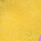

In [31]:
left = 0
top = 0
right = round(width / 26)
bottom = round(height / 15)

block1 = parent_image.crop((left,top,right,bottom))
print("top leftmost block:\n=== ======== =====")
block1

In [34]:
print("width of block:", round(width / 26), "height of block:", round(height / 15))

width of block: 41 height of block: 41




---

### Dimensions of The Image

---



In [23]:
print("width of image:", width, "height of image:", height)

width: 1067 height: 619




---

### Splitting The Image Into Blocks

---



In [0]:
left = 0
top = 0
right = round(width / 26)
bottom = round(height / 15)
block_list = []
block_list.append(parent_image.crop((left,top,right,bottom)))

for x in range(0, width, 41):
  for y in range(0, height, 41):
    left = x
    top = y
    right = x + 41
    bottom = y + 41
    block = parent_image.crop((left,top,right,bottom))
    block_list.append(block)



---

### Pulling The RGB Properties From Each Block

---

The blocks will be pulled from the parent image column by column, moving from the top-leftmost position, down to the bottom-leftmost, and continuing, moving left, along.

---




In [0]:
def get_r(lst):
  return [item[0] for item in lst]

def get_g(lst):
  return [item[1] for item in lst]

def get_b(lst):
  return [item[2] for item in lst]

def average(lst): 
    return statistics.mean(lst) 

In [0]:
r_block = []
g_block = []
b_block = []

r_block_data = []
g_block_data = []
b_block_data = []

r_block_list = []
g_block_list = []
b_block_list = []

block = 0
for block in range(len(block_list)):
  active_block = list(block_list[block].getdata())
  
  r_block_data.append(get_r(active_block))
  r_block_list.append(round(average(r_block_data[block])))

  g_block_data.append(get_g(active_block))
  g_block_list.append(round(average(g_block_data[block])))

  b_block_data.append(get_b(active_block))
  b_block_list.append(round(average(b_block_data[block])))

  block = block + 1

In [74]:
print("length of r average values:", len(r_block_list))
print("length of g average values:", len(g_block_list))
print("length of b average values:", len(b_block_list))

length of r average values: 433
length of g average values: 433
length of b average values: 433


In [75]:
print("the averages of r in blocks:", r_block_list)
print("the averages of g in blocks:", g_block_list)
print("the averages of b in blocks:", b_block_list)

the averages of r in blocks: [237, 237, 240, 243, 243, 245, 244, 243, 244, 244, 246, 245, 243, 238, 227, 168, 13, 225, 214, 193, 190, 192, 195, 194, 212, 232, 229, 238, 236, 211, 137, 128, 13, 231, 211, 81, 89, 122, 88, 88, 172, 238, 240, 228, 183, 121, 113, 125, 12, 228, 207, 116, 177, 192, 169, 138, 164, 221, 221, 142, 110, 113, 112, 118, 12, 228, 220, 203, 199, 168, 154, 179, 175, 167, 128, 110, 112, 106, 119, 172, 19, 224, 194, 202, 208, 210, 213, 170, 149, 107, 114, 111, 110, 131, 196, 204, 19, 218, 196, 219, 200, 198, 192, 114, 125, 112, 151, 190, 188, 184, 185, 203, 19, 194, 53, 182, 191, 206, 174, 135, 125, 121, 131, 178, 187, 197, 200, 201, 19, 128, 111, 70, 182, 199, 128, 146, 127, 141, 180, 183, 181, 187, 188, 139, 10, 189, 179, 213, 206, 171, 122, 123, 157, 176, 179, 181, 181, 154, 112, 114, 11, 156, 122, 104, 86, 113, 138, 165, 182, 183, 177, 175, 127, 93, 104, 114, 12, 58, 146, 172, 146, 30, 7, 25, 153, 184, 151, 93, 85, 84, 94, 119, 15, 41, 110, 153, 143, 110, 100, 85, 6



---

## Download Kaggle Dataset With a Neat Little Ditty

---



In [0]:
os.environ['KAGGLE_USERNAME'] = "keenandrea"
os.environ['KAGGLE_KEY'] = "df347d3b581e5cad8bda11ebdd72e9bb"

In [19]:
!kaggle datasets list -s painter

ref                                    title                         size  lastUpdated          downloadCount  
-------------------------------------  ----------------------------  ----  -------------------  -------------  
mfekadu/painter-test                   painter test                  11GB  2018-11-04 07:02:48             76  
ikarus777/best-artworks-of-all-time    Best Artworks of All Time      2GB  2019-03-02 09:21:51           4586  
mfekadu/painters-train-part-3          painter train part 3          12GB  2018-11-04 06:57:40             39  
mfekadu/painters-train-part-1          painters train part 1         12GB  2018-11-04 06:11:05             90  
jannesklaas/scifi-stories-text-corpus  SciFi Stories Text Corpus     56MB  2018-09-29 10:15:44            660  
mfekadu/painters-train-part-2          painters train part 2         12GB  2018-11-04 06:17:37             30  
gfolego/vangogh                        Vincent van Gogh's paintings  34KB  2016-08-26 14:24:33          

In [20]:
!kaggle datasets download -d ikarus777/best-artworks-of-all-time -p /content

100% 2.16G/2.16G [00:55<00:00, 59.8MB/s]
100% 2.16G/2.16G [00:55<00:00, 42.2MB/s]


In [0]:
!unzip -q best-artworks-of-all-time.zip

In [0]:
!unzip -q images.zip

In [0]:
fnames = glob.glob('images/Pablo_Picasso' + '/*.jpg')

In [0]:
child_image_list = []
for f in fnames:
  child_image_list.append(f)

In [105]:
print(child_image_list)

['images/Pablo_Picasso/Pablo_Picasso_362.jpg', 'images/Pablo_Picasso/Pablo_Picasso_280.jpg', 'images/Pablo_Picasso/Pablo_Picasso_353.jpg', 'images/Pablo_Picasso/Pablo_Picasso_365.jpg', 'images/Pablo_Picasso/Pablo_Picasso_253.jpg', 'images/Pablo_Picasso/Pablo_Picasso_257.jpg', 'images/Pablo_Picasso/Pablo_Picasso_378.jpg', 'images/Pablo_Picasso/Pablo_Picasso_255.jpg', 'images/Pablo_Picasso/Pablo_Picasso_358.jpg', 'images/Pablo_Picasso/Pablo_Picasso_339.jpg', 'images/Pablo_Picasso/Pablo_Picasso_215.jpg', 'images/Pablo_Picasso/Pablo_Picasso_399.jpg', 'images/Pablo_Picasso/Pablo_Picasso_430.jpg', 'images/Pablo_Picasso/Pablo_Picasso_108.jpg', 'images/Pablo_Picasso/Pablo_Picasso_311.jpg', 'images/Pablo_Picasso/Pablo_Picasso_199.jpg', 'images/Pablo_Picasso/Pablo_Picasso_142.jpg', 'images/Pablo_Picasso/Pablo_Picasso_256.jpg', 'images/Pablo_Picasso/Pablo_Picasso_46.jpg', 'images/Pablo_Picasso/Pablo_Picasso_57.jpg', 'images/Pablo_Picasso/Pablo_Picasso_343.jpg', 'images/Pablo_Picasso/Pablo_Picasso

In [106]:
child_list = []

r_child = []
g_child = []
b_child = []

r_child_data = []
g_child_data = []
b_child_data = []

r_child_list = []
g_child_list = []
b_child_list = []

child_image = 0
for child_image in range(len(child_image_list)):
  image = Image.open(child_image_list[child_image],'r')
  resized_image = image.resize((41,41))

  active_child = list(resized_image.getdata())

  r_child.append(get_r(active_child))
  # r_child_list.append(round(average(r_child[child_image])))
  
  g_child.append(get_g(active_child))
  # g_child_list.append(round(average(g_child[child_image])))

  b_child.append(get_b(active_child))
  # b_child_list.append(round(average(b_child[child_image])))
  # child_list.append(resized_image)
  
  child_image = child_image + 1

# child = 0
# for child in range(len(child_list)):
#   active_child = list(child_list[child].getdata())

#   r_child.append(get_r(active_child))
#   r_child_list.append(round(average(r_child[child])))
  
#   g_child.append(get_g(active_child))
#   g_child_list.append(round(average(g_child[child])))

#   b_child.append(get_b(active_child))
#   b_child_list.append(round(average(b_child[child])))

#   child = child + 1

TypeError: ignored

In [107]:
print(active_child)

[10, 10, 0, 8, 18, 0, 1, 7, 0, 0, 3, 36, 15, 4, 0, 14, 0, 20, 151, 7, 15, 4, 11, 6, 17, 13, 24, 10, 8, 10, 5, 8, 64, 22, 5, 0, 55, 36, 94, 69, 30, 0, 0, 118, 0, 128, 0, 163, 1, 29, 12, 0, 0, 5, 89, 106, 32, 11, 0, 17, 18, 31, 19, 1, 0, 49, 7, 5, 16, 18, 13, 161, 0, 133, 21, 11, 50, 209, 175, 188, 123, 118, 56, 33, 190, 0, 191, 223, 215, 141, 200, 176, 222, 178, 9, 17, 229, 101, 56, 0, 238, 7, 0, 2, 6, 2, 9, 7, 15, 3, 33, 115, 19, 2, 105, 65, 112, 63, 165, 0, 70, 76, 212, 193, 221, 245, 17, 192, 190, 107, 0, 255, 18, 3, 6, 1, 0, 198, 92, 241, 16, 0, 8, 1, 8, 30, 7, 11, 14, 31, 2, 21, 12, 6, 23, 5, 0, 28, 231, 135, 0, 75, 86, 151, 88, 96, 219, 118, 0, 157, 202, 181, 193, 8, 178, 63, 81, 92, 35, 0, 233, 3, 14, 0, 26, 5, 3, 4, 1, 13, 7, 19, 4, 1, 44, 0, 201, 216, 97, 42, 1, 106, 242, 1, 0, 177, 138, 125, 236, 235, 5, 243, 165, 4, 249, 34, 196, 193, 219, 224, 235, 8, 20, 205, 14, 4, 13, 0, 5, 13, 9, 13, 6, 6, 21, 126, 123, 201, 237, 144, 103, 25, 155, 115, 0, 214, 3, 185, 22, 2, 134, 78, 20

In [66]:
r_child = []
g_child = []
b_child = []

r_child_data = []
g_child_data = []
b_child_data = []

r_child_list = []
g_child_list = []
b_child_list = []

pixels = 0
for pixels in range(len(child_pixels_list)):    
  r_child.append(get_r(child_pixels_list[pixels]))
  r_child_list.append(round(average(r_child[pixels])))
  
  g_child.append(get_g(child_pixels_list[pixels]))
  g_child_list.append(round(average(g_child[pixels])))

  b_child.append(get_b(child_pixels_list[pixels]))
  b_child_list.append(round(average(b_child[pixels])))

  pixels = pixels + 1

TypeError: ignored

In [63]:
print(r_child_list)

[16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,